
# Section 4: Feeding the model - parameters estimation and inference 
While defining a reasonable architecture for the model(s) is guided by the general principles discussed in the notebooks Section 0 - Section 1, being able to make testable predictions requires to determine, or at least reasonably guess, model parameters. Parameter estimation is a key challenge in computational biomedicine, in particular because only a small fraction of the parameters may be measured “directly”, while others are obtained indirectly from data (“fitted”). The purpose of this section is to go over the important questions that arise when it comes to parameter estimation, and get a qualitative understanding of some common methods used to address these questions, and the associated vocabulary. Rather than a substitute to a full course in data analysis, this notebook shall be viewed as a general introduction to data analysis in the context of mathematical/computational modeling of biological and biomedical systems. It is a collection of tips and thoughts which should help you to handle model parameters in an optimal way.

If the model has been constructed along the guidelines provided in this course, the model structure encompasses a basis of “known” interactors and interactions, and a subset of hypotheses on either new interactors or new interactions which the model allows to test. The model parameters related to the former category of interactors/interactions are generally constrained by published data, and reasonable ranges of values for such parameters can therefore be pulled from the literature, hence we will focus on how to get information on the <b> other parameters, related to the hypothesized interactions </b>. 

## The difficulty of parameter measurement and estimation: what a <i> measurement </i> is
Model parameters depend on the type of modeling (see Figure below). Some might be obtained directly or indirectly from data (green boxes). Some might also be inferred from certain types of (microscopic) modeling, to feed higher-level models (blue arrows).  


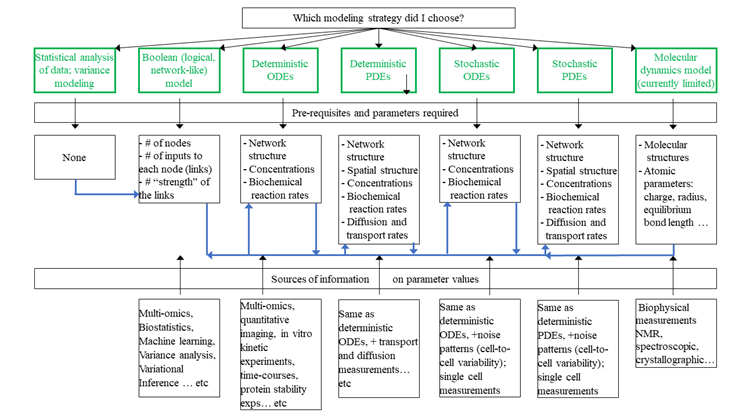

As a crucial introductory point, we stress that <b> the inference of any parameter from a biological measurement is tied to a model, or at least a theoretical framework in which the measurement is interpreted. </b>   

This is obvious when a parameter is determined indirectly, by fitting experimental data to a model. Remember the road traffic example where we are interested in knowing the parameter “n=number of cars on highway #1 (Espoo-Helsinki) per hour”, but instead of measuring it directly, we count the number of cars $N$ that leave Espoo towards Helsinki during an hour with no information on the itinerary. If this data is fitted with a road network model including only the main highway #1, then the fit will yield $n=N$ because in the model, all cars leaving Espoo towards Helsinki (the variable measured) take highway #1. If the same data is fitted with another road network model that includes all secondary routes, the model will include the parameter $n$ but the fit will yield $n<N$ since many cars will use other routes within the network. Thus, the <i> same </i> parameter extracted from the <i> same </i> dataset can be <i> very </i>  different depending on the model used to fit the data. Therefore, using published model parameters requires caution, and a deep understanding of the theoretical framework in which this parameter has been interpreted from measurements. 

But the statement that <b> the inference of any parameter from a biological measurement is tied to a theoretical framework in which the measurement is interpreted </b>  is true for <b> any </b> parameter measurement, including <b> what we believe to be direct measurements </b> in targeted experiments. Indeed, we almost <i> never </i> measure directly any biological quantity. We measure, with physical detectors, physical quantities that we believe are associated with the biological quantity, and to quantify this association we use …. <b> models </b>. Let’s go through a few classical examples: 

- when we measure a growth curve with a spectrophotometer, we directly measure the amount of light of a certain wavelength absorbed by the cell solution (Optical Density, OD). Then, this amount of light is <b> fitted with a model where the OD is proportional to cell mass </b>.  But 1) the constant of proportionality might depend on the type of cells, their chemical content… 2) cell mass is <i> not </i> cell volume, neither cell density, nor cell number, and does not distinguish live and dead cells, and 3) the <b> model itself might become untrue </b> if for instance, throughout its growth, the cell synthesizes a molecule that absorbs light at the same wavelength. 
- when we measure concentrations of fluorescently-tagged proteins with fluorescence microscopy, what we directly measure is either photons (if out microscope is equipped with single photon detectors, and we are working in the right illumination regime), or electric signals that are triggered by the interaction of photons with semi-conductors (e.g. avalanche photodiodes). In any case, we’re very far from directly measuring proteins concentrations. But we fit this data with <b>  a model where the recorded signal is proportional to protein concentration </b>. Again, the constant of proportionality depends on a lot of things (pH, type of fluorescent tag, existence of previous illumination, protein degradation rate…). And again, the model itself can fail, for instance if we are saturating detectors, or confocal conditions are not ensured… 
- the same is true when quantifying proteins using “quantitative” Western blots. What we actually measure is either an optical signal (staining or fluorescent secondary antibodies) or a radioactive signal, but not a total number of proteins. This signal is fit with a <b> model where the signal measured is proportional to the total protein content of the extract loaded on the gel within each band </b>, which itself is believed to be proportional to the amount of proteins in cells… 
- when we aim to infer a substrate-enzyme binding affinity $K_d$ from <i> in vitro </i> measurements of the reaction velocity (i.e., the rate at which substrates are converted to products in a controlled reaction), we generally fit the reaction velocity data with a Michaelis-Menten equation for the reaction kinetics, and identify $K_d$ with the Michaelis-Menten constant. Doing this, we are <b> fitting the data with a Michaelis-Menten model for enzymatic kinetics </b>, and 1) there are situations where the Michaelis-Menten constant deviates from the $K_d$ and 2) there are situations where the Michaelis-Menten approximation is not even valid, and the entire model falls down. 

Hence, in short, <b> any experimental measurement of a parameter is in fact a fitting of a direct measurement to a model of how the biological parameter affects this measurement </b>. So when using data, including what looks like a direct measurement, to infer a model parameter, the very first question to ask is: <b> can any of the other model parameters or variables influence the result of my experiment? </b> If the answer is no, then it means that all the things (e.g. pH, temperature… ) that influence the measurement are not included in the model. Hence, in this scenario the measured parameter can be used directly to feed the model, with the restriction that the model prediction will be “valid” in the same conditions (pH, temperature… ). If the answer is yes, then the next one is <b> how much do other model parameters influence the measurement? </b>  Answering this question in order to design strategies to improve parameter measurements is the focus of this section. 

In the context of mathematical modeling of biological systems, the analysis of the influence of parameters on experimentally measurable (directly or not) model outputs relates to two distinct categories of situations, which will be discussed separately: the case where <b> we have experimental data from which we want to obtain model parameters - Parameter Inference - </b> and the situation where we want to <b> modify parameters and predict the changes in measurable biological quantities - Model Predictions </b>. Both are in fact not mutually exclusive, since accurately measuring non-controllable model parameters may be an important pre-requisite to accurately predict the system’s behavior upon changes of experimentally controllable parameters. 



## Parameter inference

As illustrated in the examples above, the purpose of parameter inference is to use data to measure (or at least, get quantitative information on) a parameter <b> within the framework of a given model </b>. Biological data is inherently stochastic, but follows deterministic trends, hence any measurement is a mix of a deterministic part and a stochastic part. Therefore, biological data can be interpreted in the frameworks of both deterministic and stochastic models. But in both cases, because the data itself is stochastic, the parameter values that we infer from the data are <b> estimations </b> of the underlying parameter values (one would need an infinite number of an infinite number of different measurements to actually <b> measure </b> the parameter). So the adequate language in parameter inference problems is the language of statistics, and the parameter values we obtain are <b> statistical estimators </b> of the underlying parameters. This explains <b> why there are so many different ways of inferring parameters from limited datasets </b>, because there always exist many different statistical estimators that all have their pros and cons and range of “optimal validity”. 

The take-home message is therefore that, together with any estimation of a parameter, we shall always provide the uncertainty with which this parameter is determined

### 1) Principles of data fitting (deterministic models)
In a deterministic model, the output variables (for instance, time-course of a protein phosphorylation) are functions of the input variables (e.g. concentrations of kinases and phosphatases) and the model parameters (e.g., rates). Formally, this can be written as:

$$outputs=F(inputs,\alpha_1,\alpha_2 … \alpha_N)$$ 

where we have assumed our model has $N$ parameters $\alpha_1,\alpha_2 … \alpha_N$. If we have been able to solve the model analytically, we are able to <b> write an explicit mathematical formula for the function F as a function of its parameters </b>, and thus we can plot curves of $outputs$ as a function of any $input$ or $parameter$. If we haven’t found such an analytical solution, we can “integrate” our model (generally, ODEs/PDEs or algebraic equations) numerically and instead of finding a closed form mathematical formula, we get the values $output_i=F_i$ for a discrete number of input values $input_i$, for any possible values of the model parameters. This is the case, for instance, when we integrate an ODE/PDE model: for any set of parameters that we freely choose, we obtain the solution $F$ at discrete input times (and for PDEs, discrete input positions in space). And we can almost always choose which discrete times and positions, so in short we are able to plot the function $outputs=F(inputs, \{\alpha_i\})$, for any set of parameter values that we want. 

Parametric fitting is the process by which we try to find the parameter values   $\alpha_1^0,\alpha_2^0 … \alpha_N^0$ that minimize the deviation (or error) between a set of outputs $ O^i_{meas}$ measured for a given set of input values, and a set of output values $ O^i_{pred}$ predicted by the model for the <b> same inputs values </b>. There are many different fitting procedures and the purpose here is not to list all of them, however they generally differ on <b> how the “error” is defined </b> and/or what <b> minimize </b> means in the context of a particular procedure. 

A very popular method is least-squares fitting, where the error function is defined as: 

$$E(\alpha_1,\alpha_2 … \alpha_N) = \sum_{i=1}^K \displaystyle \Bigg(   O^i_{meas}- O^i_{pred}(\alpha_1,\alpha_2 … \alpha_N)  \Bigg)^2 $$

$K$ is the total number of measurements of the output $O$ and the minimization is understood as finding the smallest value of the function $E$ of several variables $\alpha_1,\alpha_2 … \alpha_N$, i.e. finding the values  $\alpha_1^0,\alpha_2^0 … \alpha_N^0$ for which $E$ is minimal. 

One immediate problem we can see with such an approach is that with such a definition of the error function, each measurement is equally weighted in the total error and thus contributes to the same extent to the estimation of the parameters minimizing $E$. In practice, some measurements might be more reliable than other, or we might even want to <b> choose </b> that some measurements are more important. An alternative is then to define an error function with different <b> weights </b> for all residuals $ O^i_{meas}- O^i_{pred}(\alpha_1,\alpha_2 … \alpha_N)$:

$$E(\alpha_1,\alpha_2 … \alpha_N) = \sum_{i=1}^K w_i*\displaystyle \Bigg(   O^i_{meas}- O^i_{pred}(\alpha_1,\alpha_2 … \alpha_N)  \Bigg)^2 $$

where the choice of the weights $w_i$ is completely free. A popular choice is to use $w_i=1/\sigma_i^2$ where  $\sigma_i^2$ is the variance of the i-th measurement. This choice reduces the weight of the less-reliable measurements in the estimation of the parameters, and happens to be the best choice when the different measurements are independent and uncorrelated. However, we can imagine to chose weight coefficients that scale with the typical scale of the measurement $O^i$ if it happens that the $O^i$ are measurements of different biological quantities… this provides a way to compare apples and oranges. 


When the model is stochastic, in principle any set of observations $O_i$ can be explained by any set of parameters, just because any set of parameters can generate any output (remember: outputs are random variables). Any set of observations $O_i$ can be explained by any set of parameters? Yes. But not with the same probability. When fitting a dataset with a stochastic model, we therefore define the likelihood function, which is the probability to observe what we have observed knowing the underlying model and its parameters $\alpha_1,\alpha_2 … \alpha_N$ :


$$ L(\alpha_1,\alpha_2 … \alpha_N) = Proba(observing \, \{O^i_{meas} \}|\alpha_1,\alpha_2 … \alpha_N)$$

This probability is then computed in the framework of the stochastic model, for instance by simulating the model a large number of times for each choice of parameters and computing the number of time $O_i$ is obtained, relative to the total number of simulations, and then reiterating for a new choice of parameters. The optimal parameters $\alpha_1^0,\alpha_2^0 … \alpha_N^0$ are then obtained upon <b> maximization </b> of the likelihood function with respect of the parameters. 


We stress here that regardless of  how the error function $E$ is defined, “how much minimization” we can achieve (how small it can get) depends on the number of model parameters, and generally the more parameters we have, the smaller $E$ can be. In fact, any function $ O^i_{pred}(\alpha_1,\alpha_2 … \alpha_N)$ that goes exactly through the observed points $O^i_{meas}$ at the sampled input values will lead to a least square error of exactly 0, the smallest we can get. And mathematics tell us that there is always a polynomial function that go through exactly all points, for any discrete number of points. Hence, there always exist a model curve that fits exactly all data points. This of course seems ridiculous, but it is a true and universal statement: <b> more complex models with more parameters are susceptible of producing better fits </b>. This effect is called <b> over-fitting </b>, and is nicely illustrated by this schematic picture from Wikipedia (no further explanation is needed, isn’t it?): 



















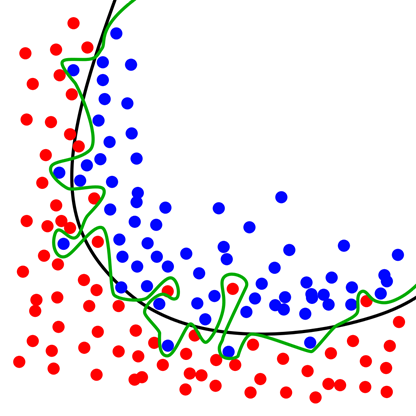

This is also true for stochastic models and using of the likelihood function for parameter fitting. Too many parameters in a model, especially if they provide an excellent fit of a dataset, generally also restrict a lot the ability of the model to accurately <b> predict </b> other observations, and there is always a trade-off between how well we can fit data and how predictive a model is. 
This statement is illustrated by the famous quote from the French poet Paul Valéry: <b> “Ce qui est simple est toujours faux. Ce qui ne l'est pas est inutilisable. </b> which could be translated as <b> “What is simple is always wrong. What is not is useless. ” </b> Simple models with few parameters have the potential to guide scientific thinking on a broad range of questions, but are generally poor as accurately describing data. This duality in model choice is discussed below (model selection).
But before going further, it is important to understand what a <b> good/bad fit </b> is, and how reliable the parameter estimations we get from the fit are. 

### 2) Goodness of fit, sensitivity analysis, parameter identifiability and reliability of the parameter estimation

How good a fit is quantified by statistical tests, the choice of which depends on the type of data, the information we have on their underlying probability distribution… and are covered in the data analysis and statistics courses. The Goodness of Fit is generally a number ($\chi^2$, $R^2$ …) which indicates how well the given model, with its “optimized” parameters (see 1), describes the data. Thus, we might be inclined to <b> blindly trust </b> parameter estimations when this goodness-of-fit number is good (e.g., $\chi^2 \approx 1$). However not all these estimations are equally reliable, and to understand it we have to take a step back and thing again about our model. 
Indeed, not all model parameters equally affect the output that we have observed, $O$. And parameters that have little effect on $O$ are potentially badly determined, even if the fit is “good”. The analysis of the impact of parameters on model outputs is called <b> sensitivity analysis </b>. 

If we solved the model analytically, we have an explicit formula for the solution $F$ of our model

$outputs=F(inputs,\alpha_1,\alpha_2 … \alpha_N)$ 

and we can perform a variational analysis and formally write the difference in model output following small changes in parameters (but no changes in input) as : 

$$d(outputs)=dF=\frac{\partial F}{\partial inputs} d(inputs) +\frac{\partial F}{\partial \alpha_1} d\alpha_1 +\frac{\partial F}{\partial \alpha_2} d\alpha_2+ … +\frac{\partial F}{\partial \alpha_N} d\alpha_N $$ 

This is nothing else than the expression of the total differential of the function $F$ of several “variables”, the model parameters. Because we study how $F$ changes with respect with parameters at constant input, we set $ d(inputs)=0$ and we get: 

$$d(outputs)=\frac{\partial F}{\partial \alpha_1} d\alpha_1 +\frac{\partial F}{\partial \alpha_2} d\alpha_2+ … +\frac{\partial F}{\partial \alpha_N} d\alpha_N $$ 

What does that mean? It means that if you slightly modify the value of one parameter $\alpha_i$ from its “optimal” value obtained with the fit $\alpha_i^0$, for instance $\alpha_i=\alpha_i^0+d\alpha$ where $d\alpha$ is small compared to $\alpha_i^0$ you can expect a change in the output that is:

$$d(outputs)=d\alpha * \frac{\partial F}{\partial \alpha_i} (\alpha_1^0, …\alpha_i^0, …\alpha_N^0) $$ 

where the partial derivative is computed for the optimal parameters that yielded the best fit,  $\alpha_1^0,\alpha_2^0 …\alpha_i^0, …\alpha_N^0$. 


But conversely, it also means that <b> if you know the output with a precision </b> $d(output)$, for instance due to an uncertainty in the experimental measurement of the output, then the parameter $\alpha_i$ will be determined with an accuracy $d\alpha$ that depends on those partial derivatives. When dealing with uncertainties, we always deal with positive $d(something)$ but in the total differential of the outputs, the partial derivatives with respect to some parameters can be negative. Hence, in terms of positive-only quantities we can rewrite the total differential as an inequality:

$$d(outputs)\leq|\frac{\partial F}{\partial \alpha_1} |d\alpha_1 +|\frac{\partial F}{\partial \alpha_2}| d\alpha_2+ … +|\frac{\partial F}{\partial \alpha_N}|d\alpha_N $$ 

where $||$ denotes the absolute value. This is nothing else than the formula for the propagation of uncertainties. In a context of parameter estimation, if the measured variable is known with an uncertainty $d(output)$, the parameter $\alpha_i$ would be known with an accuracy 

$$d\alpha \geq \frac{ d(outputs)}{ |\frac{\partial F}{\partial \alpha_i} |(\alpha_1^0, …\alpha_i^0, …\alpha_N^0)},$$

which means that </b> the lower </b> $ \frac{\partial F}{\partial \alpha_i} (\alpha_1^0, …\alpha_i^0, …\alpha_N^0)$ <b>, the less accurate the determination of the parameter </b> $\alpha_i$. But if this is true for one parameter, i.e. if the optimal fit gave a ridiculously wrong value $\alpha_i^0$ for the i-th parameter, how reliable is the value of the partial derivative $ \frac{\partial F}{\partial \alpha_j} (\alpha_1^0, …\alpha_i^0, …\alpha_N^0)$ with respect to all other parameters $\alpha_j$? If it is not reliable, how reliable is the estimation of those parameters itself? 

This example teaches us that the estimation of the uncertainty of parameters fitted from experimental values is a complex problem. 

The approach we have used here is called a “one-at-a-time” sensitivity analysis method. If the model is linear or weakly non-linear, if parameters are statistically independent (non-correlated), we can assume as a first approximation that the variance in the measured quantity (or its “uncertainty”) is equally distributed between all model parameters, and in this case the uncertainty of each parameter can be estimated as 

$$d\alpha \approx |\frac{ d(outputs)}{ \frac{\partial F}{\partial \alpha_i} |(\alpha_1^0, …\alpha_i^0, …\alpha_N^0)},$$

in order of magnitude. We stress that if an explicit analytical formula for the model outputs as a function of the parameters is not available (e.g., model has been solved numerically), we cannot compute analytically the partial derivatives, however we can compute them numerically as “ratios of small differences”, obtained by comparing the values of the outputs in two numerical resolutions of the model for slightly different values of the parameter $\alpha_i$:

$$\frac{ d(outputs)}{ \frac{\partial F}{\partial \alpha_i} (\alpha_1^0, …\alpha_i^0, …\alpha_N^0)} = \frac{outputs(\alpha_1^0, …\alpha_i^0+\delta \alpha, …\alpha_N^0)-outputs(\alpha_1^0, …\alpha_i^0, …\alpha_N^0)}{\delta \alpha}$$

where $\delta \alpha$ is small compared to $\alpha_i^0$. With this way of computing the partial derivative, all the discussion above applies equally to models solved numerically. 

This simplistic approach of one-at-a-time sensitivity analysis might provide information on the accuracy of model parameters estimation, with the following restrictions/limitations/caution when using:
- combined effects of parameters often happen, in which case analyzing the sensitivity with respect to individual parameters leads to erroneous interpretations.
- similar effects on the outputs from different parameters: this is particularly frequent if the model has a large number of parameters; this situation will be discussed later more extensively. 
- analysis of individual outputs separately when multiple outputs are available: it is still possible to analyze both outputs simultaneously, but if they are somehow correlated through some - but not all - of the parameters, the sensitivity with respect to those will be artefactually emphasized. 

We have introduced it here for pedagogical purpose, because it illustrates the general rule of thumb: the lower $|\frac{\partial F}{\partial \alpha_i} |$ for the optimal, fitted parameter values (the <b> sensitivity </b> of the outputs to the parameter $\alpha_i$), the less accurate the estimation of the parameter $\alpha_i$. We will use this rule of thumb to discuss more complex notions. 

In practice, because models include multiple parameters, <b> global sensitivity analysis </b> approaches are more reliable. <b> Global sensitivity analysis </b> refers to the analysis of output variations when <b> all parameters can be changed at the same time </b>. Those techniques are powerful because they measure sensitivity across the entire parameter space, and therefore perform well even in presence of strong non-linear effects, non-independence of parameters (i.e. change in one parameter can always be compensated by a change in another or a few others), interactions in parameters …  They can be applied to deterministic models with or without an analytical solution, but also to stochastic models. The downside of such global approaches is that they usually have a high computational cost.

One of such methods is the <b> Sobol variance-based sensitivity analysis method </b>. The principle of the method is to generate model outputs with a large number of randomly picked parameter values, and to analyze the resulting <b> variance </b> in the output. Then, a statistical decomposition method is used to separate the contributions to the output variance in terms due to the variance of all parameters independently of each other, + terms due to the cross variance of all pairs of parameters, + terms due to the cross variance of triplets of parameters… and so on. 

Such global approaches that screen a large number of parameter values are also very useful to infer parameters of a stochastic model from data. Indeed, in a stochastic model any variation in a parameter results in a new stochastic trajectory of the system. But not changing anything also results in a new trajectory. Hence, there is an output variance associated with the stochasticity of the model even without changing any parameter. The actual spread of this variance is also in general <b> dependent on the parameters </b>. Hence, the variance in model outputs that are compared with data contain information on the model parameters as well. So, biological noise perturbs parameter analysis, but also offers an <b> additional tool for parameter inference .</b>





### 3) Parameter identifiability and reliability of the parameter estimation

Another limitation of sensitivity analysis stems from the fact that even though biomedical data available to compare with model output tends to become richer and richer, it cannot be </b> unlimited </b>. Hence, the situation can happen where a given parameter has <b> no influence at all on any of the outputs we have measured </b>, but yet it affects either other model outputs, of the model behavior in different dynamical regimes and then getting information on this parameter is important to make accurate model predictions. For instance, assume we model a biochemical system that accounts for some fast processes on the millisecond scale, and we want to infer parameters from data acquired in response to a stimulus with an experimental time resolution of 1s (due e.g. to a technical limitation). By the time we acquire the first time point following stimulation, all fast processes have reached a steady state, regardless of the exact values of the parameters describing the fast processes. Hence, our experiment won’t be sensitive to those parameters. Yet, they influence the dynamics at the millisecond timescale, and our model will be unable to provide any insight on another experiment that has a faster time resolution. 

Another common situation is the case where several parameter changes, or changes in pairs, triplets… of parameters have exactly the same effect on our model outputs. In this case, the model output is still sensitive to the parameters, but is not able to <b> discriminate between them </b>. In both cases, we say that the parameters are <b> not identifiable </b>. 

And in both cases, regardless of how sophisticated our sensitivity analysis method is, <b> we are facing a wall </b> because the measurements we have performed are inherently <b> incapable </b> of distinguishing the influence of two (or more!) parameters. 

The <b> identifiability </b> of a model parameter is a crucial notion one often encounters in the context of parameter inference. It is linked to the question: Can <i> any </i> available data provide <i> any </i> insight on the value of the parameter? If the answer is “no”, then the parameter is said <b> non-identifiable </b>. In this situation, we should try to formulate the model without the model interaction related to this parameter. If this is impossible, we should try to <b> design an experiment that could turn this no into a yes </b>. If this is not possible, for instance due to current technical limitations, then the dynamical behavior of the model shall be studied <b> for any possible value of this parameter </b> and conclusions shall be robust to changes in this parameter. 

There are generally speaking two categories of situations in which we answer “no” to the question: can <i> any </i> measurement provide <i> any </i> insight on the value of the parameter? The first category is when variations in this parameter (which we denote $\alpha$ do not affect any measurable output $Y$ of the system: for any $Y$, 

$$\frac{\partial Y}{\partial \alpha }=0.$$
In other words, the output variables that we have measured are “insensitive” to the parameter $\alpha$, in the sense of parameter sensitivity analysis. The second category is when the effects of variations in this parameter cannot be distinguished from variations caused by another parameter $\beta$ on all measurable outputs $Y$ of the model :

$$\frac{\partial Y}{\partial \alpha }=\frac{\partial Y}{\partial \beta }.$$

In this case, any measurement we perform can be equally attributed to $\alpha$ or $\beta$ and we can’t get insight on those parameters: $\alpha$ and $\beta$ are <b> not independent </b>, or rather we should say that $Y$ does not depend independently on $\alpha$ and $\beta$. 

Let’s look at an example to understand this notion. We assume a simple gene transcription model where a pre-formed RNA Pol II complex binds a gene promoter with rate $k_{on}$ (unbinds with rate $k_{off}$, forming a pre-initiation complex, which eventually enters an active mRNA elongation phase with rate $k_{elong}$ and completes this phase with rate $k_{term}$, releasing the RNA Pol II complex in the nucleoplasm and releasing one full-length mRNA molecule. In addition, we assume that the elongating polymerase complex can enter a “paused” state (with rate $k_{p}$) where it stops elongating the mRNA, and leaves this paused state with a rate $k_{q}$. This model can be represented with the following graph: 

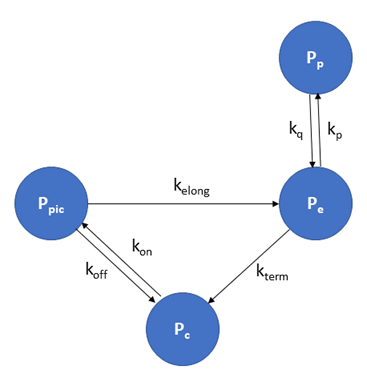

where $P_c$ is the number of nucleoplasmic complexes, $P_{pic}$ the number of pre-initiation complexes, $P_{e}$ the number of actively elongating polymerases and $P_{p}$ the number of paused ones. 




The ODEs representing the variations of the number of polymerase complex at each stage of the process are (good exercise to re-derive them): 

$$\frac{dP_c}{dt}=k_{off}*P_{pic}+k_{term}*P_e-k_{on}*P_c$$

$$\frac{dP_{pic}}{dt}=-k_{off}*P_{pic}-k_{elong}*P_{pic}+k_{on}*P_c$$

$$\frac{dP_e}{dt}=k_{elong}*P_{pic}-k_{term}*P_e-k_p*P_e+k_q*P_p$$

$$\frac{dP_p}{dt}=k_p*P_e-k_q*P_p$$

from which we get (by summing all 4 equations)

$$\frac{d(P_{pic}+P_c+P_e+P_p)}{dt}=0$$

which expresses the fact that the total pool of polymerase complexes $P_{tot}= P_{pic}+P_c+P_e+P_p$ is conserved over time by this process. 


In the steady state of this ODE model, $d/dt=0$  and all the left hand sides of the equations above are =0. Hence, in Eq. 2 we can get $P_{pic}$ as a function of $P_c$ and parameters, and in Eq. 3 $P_e$ as a function of $P_{pic}$ and parameters, and in Eq. 4 $P_p$ as a function of $P_e$ and parameters:  

$$P_{pic} = P_c*\frac{k_{on}}{ k_{off}+ k_{elong}}$$


$$P_e=P_{pic}*\frac{ k_{elong}}{ k_{term}}= P_c*\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}$$


$$P_p=P_e*\frac{k_p}{k_q}= P_c*\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}$$


and from the conservation of the total number of polymerase complexes, we get: 

$$P_c=\frac{P_{tot}}{1+\frac{k_{on}}{ k_{off}+ k_{elong}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}}$$

and using this expression for $P_c$ we can compute the steady state number of polymerases in all other stages of the process:  


$$P_{pic} = \frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{P_{tot}}{1+\frac{k_{on}}{ k_{off}+ k_{elong}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}}$$


$$P_e=\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{P_{tot}}{1+\frac{k_{on}}{ k_{off}+ k_{elong}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}}$$


$$P_p=\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}*\frac{P_{tot}}{1+\frac{k_{on}}{ k_{off}+ k_{elong}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}}.$$

And the rate of mRNA production in the steady state is therefore: 

$$\frac{dmRNA}{dt}=k_{term}*P_e=k_{term}*\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{P_{tot}}{1+\frac{k_{on}}{ k_{off}+ k_{elong}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}}$$


<b> Question 1: </b> We assume we can tag a protein component of the RNA Pol II complex with a fluorophore, and monitor the variations of the fluorescence signal over time. Can we infer some of the parameters of this model with this data?



In [2]:
#%run solutionQuestion1.py

<b> Question 2: </b> We now measure the rate of production of the mRNA molecules. After a transient regime, this rate becomes stable in time and we measure it with good accuracy. In addition, we have a probe that gives a signal from which we can compute the number of highly mobile pool of polymerases (the nucleoplasmic pool - this can be achieved by modern microscopy techniques). Can we infer some of the parameters of this model with this data? Is there a particular parameter regime in which this experiment might be even more informative?

In [9]:
#%run solutionQuestion2.py

<b> Question 3: </b> What ratio of measurable quantities should we measure to get information on the pausing dynamics k_p, k_q? What should we do to get both k_p and k_q? Is that always possible experimentally?

In [7]:
#%run solutionQuestion3.py


In complex biomedical research models, we have access to a limited amount of data (though it can be tremendous - still not “infinite”), and it is possible that not all parameters are identifiable with the available datasets. More model parameters generally reduce the identifiability of each of them, unless datasets are enriched as well. In the previous example of the gene transcription model, the experiments suggested in the question are insufficient to identify all parameters, and the model should be simplified, or extensively analyzed before conclusions are drawn (see below, parameter space analysis). The extent to which we need more data to preserve parameter identifiability in a more complex model depends on the model, there is no general rule. However, there are techniques to compare the performance of models of different complexity in fitting datasets (termed model selection methods, see below). 

 In practice, we also don’t have often a simple solution of the model like in our previous example. Hence, the identification of which parameters are identifiable and which are not is not immediate, and requires a proper methodology. This methodology is termed <b> a (structural) identifiability test </b>. The development of identifiability tests is still an active topic of research. 


<b> Further recommended reading: </b> an intuitive way to test parameter identification in systems biology-like models has been derived by Clemens Kreutz (https://doi.org/10.1093/bioinformatics/bty035). The method is based on the addition to the square error $E(\alpha_1,\alpha_2 … \alpha_N) = \sum_{i=1}^K w_i*\displaystyle \Bigg(   O^i_{meas}- O^i_{pred}(\alpha_1,\alpha_2 … \alpha_N)  \Bigg)^2 $ of a penalty term :

$$P(\alpha_1,\alpha_2 … \alpha_N)=\lambda * \displaystyle \Bigg(     \sqrt{(\alpha_1-\alpha_2^0)^2+(\alpha_1-\alpha_2^0)^2+…(\alpha_N-\alpha_N^0)^2 } - R      \Bigg)^2 $$

where $R$ is a parameter, $\alpha_i^0$ are the values of the parameters that minimize the error function (in other words, the fitted parameters), and $\lambda$ is the penalty coefficient and is chosen as $1/R^2 $ in the basic version of the method. This term quantifies <b> how much it costs to drag the parameters “away from their optimal value” </b> (specifically, at a “distance” $R$ on average). 

And the principle is intuitive: if the parameters are identifiable, there is no other parameter set that can minimize the error function in a satisfactory way, and therefore we can’t cancel the “penalty” part without increasing the “data” part ($E$). If the parameters are non-identifiable, it is possible. Hence, we know if parameters are collectively identifiable by trying to minimize both the error $E$ and the penalty $P$. If we succeed, they cannot be identified in a unique way.  

We stress that there is no general consensus on the best tests for parameter identifiability in a general model. But when inferring parameters from data, it is advised to try one identifiability approach to make sure that a given dataset is sufficient to provide model parameter values in a <b> unique </b> way. And if it is not, using sensitivity analysis allows to guess which parameters are reasonably well identified and which are not. 

### 4) model validation, model comparison: the trade-off between parameters and information

An important aspect of mathematical modeling related to parameter estimation is the possibility to describe a given biological system (and the associated data) with several different models. We’re not talking here about the possibility to choose a mathematical formulation, e.g. ODE vs PDE, steady state or fully time-dependent, stochastic vs deterministic… but really about <b> the choice of the objects and features to include in the model </b>. 

Let’s look again at the gene transcription model we studied in the previous section, and assume we have access to Global  Run On Sequencing data (GRO-seq) (that provides an estimation of the ratio of actively elongating polymerase complexes to “paused” complexes, $P_e/P_p$), access to mobility data that yields the number of nucleoplasmic complexes $P_c$ and access to RNAseq data that allows to count the mRNA rate transcription ($k_{term}*P_e$). As discussed in the previous section, several parameters of this model remain non-identifiable with these two datasets in hand. The question is: is it worth describing this data with such a complicated model?

The following model:

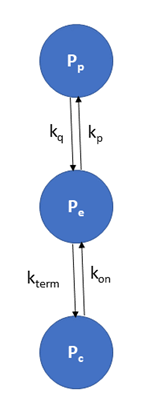

and where the steady state is 

$$P_p=\frac{k_p}{k_q}*\frac{k_{on}}{k_{term}}*\frac{P_{tot}}{1+\frac{k_{on}}{k_{term}}+\frac{k_{on}}{k_{term}}*\frac{k_p}{k_q}}$$

$$P_e=\frac{k_{on}}{k_{term}}*\frac{P_{tot}}{1+\frac{k_{on}}{k_{term}}+\frac{k_{on}}{k_{term}}*\frac{k_p}{k_q}}$$

$$P_c=\frac{P_{tot}}{1+\frac{k_{on}}{k_{term}}+\frac{k_{on}}{k_{term}}*\frac{k_p}{k_q}}$$

is also a possible description of the full biological process. A noticeable difference with the previous model is that it does not account explicitly for the pre-initiation complex stage, and therefore that the rate $k_{on}$ integrates the binding/unbinding and initiation of the elongation (i.e., the rates denoted as $k_{on}$, $k_{off}$ and $k_{elong}$ in the previous model). Thus, there are less parameters (4 instead of 6).


In the framework of this new model, the mRNA production rate in the steady state is:

$$\frac{dmRNA}{dt}=k_{term}*P_e=k_{on}*\frac{P_{tot}}{1+\frac{k_{on}}{k_{term}}+\frac{k_{on}}{k_{term}}*\frac{k_p}{k_q}}= k_{on}*P_c$$

In this model, there are still independent parameters that characterize the GRO-seq data ($k_p/k_q=P_p/P_e$), and the mRNA-seq data normalized to the mobility data ($(dmRNA/dt)/P_c$, characterized with the parameter $k_{on}$), see formulas above). Hence, there is <b> enough flexibility </b> in the model to account for all datasets available, and the fit would be as good as a fit with the more complex model we discussed first. 

Hence, which model should we choose? 

The question we are asking here is the question of <b> model selection </b>. In this simple example, the two models are qualitatively very close, and the processes of polymerase complex binding to promoter, spontaneous unbinding, elongation initiation and abortion… are rather well understood. So there is no new biology, new putative hypotheses to test included in this “initial step” of the two models. But in the general situation, different models that explain equally well the data might rely on different biological hypotheses and in this case which model we choose means <b> how do we interpret the data biologically </b> and this is a crucial point, if not the <b> most important point when doing an experiment. </b>.
This is Ockham’s principle (or “razor”): of competing hypotheses (different models) that make the same prediction (explain equally well the available data), one should select the solution with the fewest assumptions (and/or parameters). Simpler is best if, of course, it  fits well the data!  
Intuitively, the ideal model should 1) describe reasonably well the data available, 2) contain all the objects on which we intend to make predictions, and 3) contain as few additional things as possible, since any additional ingredient makes the model more complex and won’t help to describe the data or to make predictions since those are covered by 1) and 2). Because additional/unnecessary model objects and/or model interactions come with additional model parameters, the <b> number of parameters is an intuitive measure of the complexity of a model </b>. So, the trade-off between the ability of a model to explain (fit) the observations and its complexity should be well represented by the difference between the goodness of fit and the number of parameters. 


This intuitive idea of balancing model complexity with the ability to describe/fit/reproduce existing data is the basis of model selection procedures. But a model should also have a <b> predictive power </b>, i.e. be able to describe/fit/reproduce data that is yet not acquired. Indeed, selecting among competing hypotheses to understand the biological interactions and processes underlying the generation of the data we are looking at is not the only purpose of a model: another equally important purpose is to predict future observations. And this second aspect is much more complicated to quantify reasonably, for obvious reasons. This is why, again, there is no general consensus on which model selection procedure is the best. Below, we’ll describe some commonly used, with their pros and cons.

<b> Akaike Information Criterion (AIC): </b>

$$AIC_M=2*K_M-2*\ln{L_M}$$

where $K_M$ is the number of parameters in the model $M$, and $L_M$ is the maximum of the likelihood function (i.e., the value of the likelihood that the data is explained by the model $M$ when the model parameters are the best possible, those which maximize this likelihood). $L_M$ measures then how good the data fit is with the model $M$ once model parameters have been optimized. If we have in hand competing models $M_1,M_2…$ to analyze the data, we compute the AIC number for all models, and get a list of a handful of AIC numbers. The “best” model according to AIC is the one that <b> minimizes the AIC </b>. Let’s denote $M_0$ this model, and by definition we have

$$AIC_{M_0}<AIC_{M_1}, AIC_{M_1}, …$$

In practice, it is frequent that a couple of models give values of the AIC which are very close, and it might be informative to quantify <b> how likely the other models are, relative to the “best” model </b>. In the Akaike theory, this relative likelihood is (for the model $M_j$):

$$r=e^{ \frac{AIC_{M_0}-AIC_{M_j}}{2}}<1$$

Let’s compare the two gene transcription models we used previously. Let’s call $M_1$ the first, complete model with 6 parameters, and $M_2$ the shortened model with only 4 parameters. As discussed above, because both models have enough free independent parameters to describe our datasets, in practice we would find $ L_{M_1}= L_{M_2}$ (the models would perform equally well in fitting the data) and therefore $\ln{ L_{M_1}}=\ln{ L_{M_2}}$. Let’s denote $\mu$ this common value. Hence, 

$$ AIC_{M_1} = 2*6-2*\ln{ L_{M_1}}=12-2*\mu$$

$$ AIC_{M_2} = 2*4-2*\ln{ L_{M_1}}=8-2*\mu < AIC_{M_1},$$

therefore we would pick the simplest model $M_2$ as the “best” model. The relative likelihood of the other model would be:

$$r=e^{ \frac{(8-2*\mu)-( 12-2*\mu)}{2}}= e^{-2}=0.135:$$

the model 2 is 0.135 times as likely as the model 1 to be the right model underlying the data. 

Given its definition, the Akaike Information criterion does not account for the predictive power of the model, and is well adapted to situation where the data is fit to the models in terms of “probability to observe what we observed given the underlying model is … ” (i.e., when data is fitted using maximum likelihood estimators, and not squared error minimization). Hence, it is strictly speaking a criterion to compare among competing <b> statistical models </b> (termed “stochastic” models in this course), rather than deterministic mathematical models (e.g. ODE/PDE-based). This criterion appears simple and intuitive, yet it has solid mathematical foundations, and is strictly valid only in the asymptotic limit where we have an infinite number of observations. When we have to base model selection on a small number of observations, the AIC needs to be corrected, and the mathematical expression of the corrected criterion AICc depends on statistical properties of the model and of the data.


<b> Bayes Information Criterion (BIC): </b>

$$BIC_M=K_M*\ln{Q}-2*\ln{L_M}$$

where $K_M$ is the number of parameters in the model $M$, and $L_M$ is the maximum of the likelihood function (as in the AIC), and $Q$ is the number of observations available. The “best” model $M_0$ is the one that minimizes the BIC. Hence, when compared to the AIC, when using the BIC <b> the penalty associated with excess parameters increases with the number of observations </b>. In other words, the more observations we are accounting for when fitting for model parameters, the larger the fitting error we can accept from simple models with less parameters. Using the BIC, the relative likelihood of another model $M_j$ is:

$$r=e^{ \frac{BIC_{M_0}-BIC_{M_j}}{2}}<1$$

In our example where we compared the two gene transcription models, we were using only two measurements to fit the parameters: the ratio $P_p/P_e$ provided by GRO-seq data, and the ratio $(dmRNA/dt)/P_c$ provided by RNA-seq and the mobility data. Hence, $Q=2$. Without surprise, the simplest model minimizes the BIC but the relative likelihood of the more complex one becomes 

$$r= e^{-\ln{2}}=0.5,$$

i.e. because we didn’t fit that many observations with the simple model, it’s “advantage” over the more complex model is less obvious than in the AIC. Model selection using AIC or BIC do not always agree, because those apparently similar formulas stem from completely different mathematical concepts. 

Similar to the AIC, the BIC does not account for the predictive power of the model, is well adapted to the comparison of statistical/stochastic models, and becomes more and more acceptable when the number of observations $Q$ increases. 

We stress that both the AIC and BIC, which are in principle defined for stochastic models, can be somehow extended for deterministic models, replacing the maximum of the likelihood function $L_M$ by its equivalent in deterministic model parameter fitting, the error function $E$. In this case, the error function (called the residual variance) is the minimal one, computed at the values of the parameters that minimize it $E_0 =E(\alpha_1^0, \alpha_2^0 …\alpha_N^0 )$, leading to a criterion C that the “best” model will minimize:  

$$C=\lambda*K_M+\ln{ E(\alpha_1^0, \alpha_2^0 …\alpha_N^0 )} .$$

The “+” sign comes from the fact the in this context we need to minimize the error, not maximize the likelihood. There is no consensus on what the constant $\lambda$ should be, because it depends on the relative weights we intend to give to the “exactness” of fitting and the number of parameters (aren’t BIC and AIC different in this respect?). Research works have derived different forms for $\lambda$ in different purpose, and depending on the statistical properties of the residuals that compose the total error. If the latter are normally distributed, then $\lambda=1/Q$ where $Q$ is the number of observations is somehow equivalent to the Akaike criterion. Hence, $\lambda = \ln{Q}/Q$ would penalize complex models the same way as the BIC does. Another popular choice is to choose $\lambda=\sigma^2/Q$ where $\sigma^2$ is the data variance, or uncertainty. In this case, simple models are even more favored than complex ones if they describe reasonably well data that is very noisy. But, again, it depends on the purpose and those techniques for model selection should be approached with both flexibility and caution. 


<b> Minimum Message Length - Minimum Description Length criterion (MML/MDL): </b>
One common limitation of both the AIC and BIC is that they represent model complexity by its number of parameters. The Ockham’s razor principle is slightly more general, in that it states we should be looking for the <b> simplest explanation of the data </b>. Simpler does not necessarily mean less parameters (and conversely), even though <i> in general </i> it is the case. 

In addition to AIC/BIC and similar criterion, computer scientists often use the concepts of  <b> message length and description length </b> to estimate how well a model explains a given dataset. The message length ML is the length (in bits) of a code that explains both the content of the model and describes the data (obviously, the shortest explanation/description possible). The description length DL, even if it looks similar, is a fundamentally different concept: it is the length of a model-based description that <b> encodes </b> the data (for instance, “logistic growth with rate 1 and saturation 4” is a description that encodes the entire logistic curve $P(t)$ with parameters $r=1$ and $P_{max}=4$, and therefore encodes any sampling of datapoints long this curve). In both cases, the selected model is the one that minimizes the ML or the DL, hence the MML/MDL nomenclature to classify those methods. Because there are several metrics for ML and DL depending on the contexts, there are several MML/MDL methods. 


<b> Selecting for predictive power: </b>
One common limitation of both the AIC/BIC and MML/MDL approaches is that the model selection is based on <b> existing </b> datasets, and therefore does not explicitly accounts for the predictive power of a model, i.e. the ability of a model to <b> accurately describe experiments to come </b>. The universe of the possible experiments “to come” is unbounded, therefore there is no - and there will never be - a generic statistical method that is able to predict how well a model will perform in predicting a certain type of experiment that does not yet exist. In the next section, we describe general guidelines to design model validation experiments. 

However, there are techniques that allows to estimate how good a model is in predicting some data of the same type as the data on which the model has been optimized. Such techniques are called <b> cross-validation (CV) </b> techniques and are based on the split of the total dataset (generally) in two groups, the <b> training </b> dataset and the <b> validation </b> dataset. The model parameters are estimated from the minimization of the error function on the training dataset (observations $O_i$ with $i=1..i_0$ for each model independently (or the maximization of the likelihood function for stochastic models):

$$E(\alpha_1,\alpha_2 … \alpha_N) = \sum_{i=1}^{i_0} w_i*\displaystyle \Bigg(   O^i_{meas}- O^i_{pred}(\alpha_1,\alpha_2 … \alpha_N)  \Bigg)^2 $$

and once the parameters are chosen, we compute the total error (a number) on the rest of the dataset assuming that the model parameters are the ones we just picked: 


$$E_{sel} = \sum_{i=i_0+1}^{K} w_i*\displaystyle \Bigg(   O^i_{meas}- O^i_{pred}(\alpha_1^0,\alpha_2^0 … \alpha_N^0)  \Bigg)^2 $$

It somehow means that we are looking at that this second part of the dataset as a <b> future experiment </b>, and we are measuring the total error that the models yielded on this experiment. Hence, in the purpose of selecting models for their predictive power, we would choose the model that minimizes this residual error on the “future” experiment, $E_{sel}$. We could, then, add a BIC/AIC-like penalty term, to balance the choice…. We note that once the model has been selected, it is recommended to re-estimate the parameters on the entire dataset. 

In practice, of course the model choice could be influenced by how exactly we split the data. It is therefore recommended to partition the data randomly several times, in order to generate <b> many training and validation sets </b>. For each partition of the data, we compute one residual error $E_{sel}$, and we select the model that minimizes the average error over all the training+validation partitions. 
In practice also, one key parameter in this procedure is the relative size of the training and validation datasets. Having a large training dataset allows more accurate parameter estimation, hence predictions that are closer to what the model is capable of achieving. But that leaves the validation set with less datapoints to really correctly estimate this prediction, and therefore to discriminate competing models. Depending on the type of model, the optimal ratio is different. But as a rule of thumb, the validation dataset should be quite larger than the training dataset, e.g. 80% of the total dataset. 

<b> Careful with model selection! </b>

We stress that noise in data, which is unavoidable in biology, has the potential to increase the score of some models compared to other models, regardless of the selection criteria chosen. Therefore, the more models are compared, the more likely one of them “benefits” from the particular data sample, increasing the odds that we eventually select a winner model by “chance” rather than because it is indeed the best model. Hence, model selection should not be followed blindly: estimating the likelihood of other models, comparing different selections methods, studying how sensitive the selection is to a particular data sample by, for instance, randomly splitting the dataset in two or more datasets and performing parameter optimization and model selection separately on each of them, all are possible approaches to “temper” the conclusions of a model selection procedure. And, eventually, picking the right model. Or even better, <b> NOT </b> picking a wrong one and convincing all the community that the Graal has been found. 





## Parameters and model predictions

Once we have optimized (some) parameters of a model on some experimental dataset, and used model selection procedures to eliminate all models that are highly unlikely, we are generally left with 1-2 models which we <b> know </b> describe well what has been observed. At this stage, the model might already be able to provide insight on the biological mechanisms underlying some observations, since the biological hypotheses underlying the models excluded by the model selection are now part of the “unlikely” world. But another fundamental aspect of modeling is the ability to make testable predictions, in order to:

- either select among the remainder plausible models
- validate or invalidate the winner model
- or explore new biology! Which is the most exciting part. 

How the validation experiments are designed, and how the prediction is shaped depends on the particular purpose of a prediction. But the very first step is to be able to make a prediction. And in mathematical modeling, making a prediction is answering the question: <b> if I change this and/or this parameter experimentally, what change, if any, can I expect from my biological system ?</b> 

This is the reason why the very first task to perform after having optimized a model to recapitulate available data, and before making plans for validation experiments, is to explore the parameter space. 

### 1) Parameter space analysis

Exploring the parameter space means computing the changes in model output(s) associated with any possible changes in parameter values. This includes single parameter changes, but also multiple simultaneous parameter changes… Of course, we can left aside the parameters which have been constrained (if not accurately determined) by the data-based parameter optimization. But even those parameters might be tuned experimentally (e.g., even if we have fitted a complex dissociation constant $K_d$ to some data doesn’t mean it’s not interesting to study what happens in presence of proteins that are mutated to decrease their relative affinity, yielding a larger $K_d$...). Generally speaking, in principle all parameters are worth of interest. So the exploration of the entire parameter space rapidly become intractable.

This is why it is strongly recommended to <b> incorporate as many parameters as possible in re-normalized variables </b>, as we did for the space-dependent diffusive-logistic growth equation in which all 3 parameters (diffusion coefficient, growth rate and saturation value) have been incorporated in renormalized time, space, and variable amplitude. Indeed, the overall effect of such parameters now becomes trivial, and they might be excluded from the parameter space analysis. For instance, if we have a model $M$ where one parameter $k$ is “absorbed” in a pseudo-time $\tau = k*t$, and we have explored the parameter space defined from all other and found the system’s dynamical regimes as a function of $\tau$, then in “real” time $t$ the same regimes are accessed at time $\tau/k$. Period. 

Renormalizing time, space, and all other biological variables will considerably reduce the amount of other parameters, and generally will be associated with renormalized version of those parameters. Hence, “clusters” of parameters shall be treated as single parameters, this will make the parameter space exploration easier. For instance, in the gene transcription model the steady state is:


$$P_c=\frac{P_{tot}}{1+\frac{k_{on}}{ k_{off}+ k_{elong}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}}$$

$$P_{pic} = \frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{P_{tot}}{1+\frac{k_{on}}{ k_{off}+ k_{elong}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}}$$

$$P_e=\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{P_{tot}}{1+\frac{k_{on}}{ k_{off}+ k_{elong}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}}$$

$$P_p=\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}*\frac{P_{tot}}{1+\frac{k_{on}}{ k_{off}+ k_{elong}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}+\frac{k_{on}}{ k_{off}+ k_{elong}}*\frac{ k_{elong}}{ k_{term}}*\frac{k_p}{k_q}}.$$

And in fact, there are only 4 parameters in the steady state, and as long as we are performing parameter space exploration for steady state variables, we can define only 4 parameters: 

$$P_{tot},\frac{k_{on}}{ k_{off}+ k_{elong}},\frac{ k_{elong}}{ k_{term}},\frac{k_p}{k_q}$$

The first one $ P_{tot}$ can be absorbed in the renormalization of all polymerase populations to the total population, which leaves us with “only” 3 effective parameters, $K_1=\frac{k_{on}}{ k_{off}+ k_{elong}},K_2=\frac{ k_{elong}}{ k_{term}},K_3=\frac{k_p}{k_q}$, and with the following expressions for the renormalized polymerase populations in each stage of the process, in terms of these effective, independent parameters:

$$\frac{P_c}{P_{tot}}=\frac{1}{1+K_1+K_1*K_2+ K_1*K_2*K_3}$$

$$\frac{P_{pic}}{P_{tot}} = \frac{K_1}{1+K_1+K_1*K_2+ K_1*K_2*K_3}$$

$$\frac{P_e}{P_{tot}}=\frac{K_1*K_2}{1+K_1+K_1*K_2+ K_1*K_2*K_3}$$

$$\frac{P_p}{P_{tot}}=\frac{K_1*K_2*K_3}{1+K_1+K_1*K_2+ K_1*K_2*K_3}.$$

We could even make the equations look simpler, by renaming $K_1*K_2$ and $K_1*K_2*K_3$. But for the purpose of reducing the extent of the parameter space, this is not useful.


Following this preliminary reduction of the parameter space to a minimal number of <b> free, independent effective parameters, </b> the outputs of the model need to be evaluated for all biologically plausible values of these parameters. Each parameter can span orders of magnitude, and in non-linear models or models with complex dynamics, some parameters can “interact” in a way that interesting responses of the system are achieved only upon a coordinated change in several parameters. Thus, studying independently the consequences of the parameter variations one at a time is generally insufficient. 3D-dimensional plots can be used to represent graphically outputs with two varying parameters, but that can be insufficient. 

A way to circumvent this limitation of the physical space to 3-dimensions, which allows only to represent graphically in a exhaustive way the variations with respect to 2 parameters is to generate output model data using <b> a large number of sets of randomly chosen parameters </b>. In this dataset, each set of parameters will be associated with predicted values for all model outputs. Then, the profiles of output data can be classified/sorted in different classes of model response regimes, and for each response, the parameter ranges yielding this response are automatically identified. This technique has the advantage to rapidly explore the entire parameter space, and to reveal particular combinations of values/ranges of different parameters associated with a given set of model outputs values/ranges. This approach can be complemented with a standard model output plotting in function of parameters, which is made easier once the different regions of the parameter space and their association with model response regimes have been identified. This method has the advantage to have no limitation in the number of original parameters, and to be equally applicable to models where an explicit analytical solution has been found, and to models solved or simulated numerically (with a computational cost for the latter). 

### 2) Sensitivity, identifiability, and validation experiments design
The exploration of the parameter space allows to identify parameter ranges where new biology happens, and to suggest experiments which have never been attempted before. This is the <b> final purpose of mathematical modeling in biology and biomedical sciences.</b> Once such a parameter range has been identified, it is time to plan the experiment. 
Any model is a simplification of the reality and comes with assumptions, among which are the “known” parameters, for instance pulled from the literature or inferred from previous datasets. Paraphrasing the famous economist Edward Leamer, model predictions are robust if they are valid over a range of assumptions and parameter values “wide enough to be credible”, and are themselves associated with a confidence interval “narrow enough to be useful”. If predictions are too sensitive to the uncertainty in the assumptions or “known” input parameters, they are unlikely to ever happen. If they are not accurate enough, if they don’t provide enough “contrast”, then the experimental signature of our prediction will be drowned in biological noise and we’ll struggle to convince the community that we have found something new. 

Imagine we are modeling a biological mechanism, and our model predicts that a certain parameter $\alpha_0$ is a key determinant of the mechanism, in a parameter regime where the other parameters $\alpha_1,\alpha_2…$ are within biologically reasonable ranges. Then, the condition that “the prediction must not be too sensitive to the uncertainty in the assumptions or “known” input parameters” can be summarized as:

$$\frac{\partial Y}{\partial \alpha_1}\approx \frac{\partial Y}{\partial \alpha_2}\approx … \approx 0$$

and the condition “ the prediction is accurate enough, provides enough contrast” can be summarized as: 

$$\frac{\partial Y}{\partial \alpha_0}=maximal.$$

Hence, the problem of finding the ideal experiment to demonstrate that $\alpha_0$ is a key determinant of the mechanism is to <b> find a biological variable </b> $Y$ <b> that can be expressed in terms of the model variable </b> and which is such that $\frac{\partial Y}{\partial \alpha_1}, \frac{\partial Y}{\partial \alpha_2} … $ are as small as possible, and $\frac{\partial Y}{\partial \alpha_0}$ as large as possible (in absolute value). This is a sensitivity problem: we seek for a variable which is very sensitive to the parameter of interest, and not sensitive to others, and these conditions have to be realized in the range of parameter values where the experiment will be performed. 

Let’s illustrate this on our gene transcription example: imagine we want to demonstrate that RNA Pol II pauses when transcribing certain genes, and not pausing when transcribing others. Which variable should we measure? 

Because we want to compare across different samples (i.e., different genes) what the pausing situation is (pausing rate $k_p$), we seek a model variable which is very sensitive to $k_p$ (or, equivalently, the renormalized parameter $K_3$, i.e. a model output for which the difference between the low $K_3$ and high $K_3$ regimes is emphasized. 

Below is a Python code that plots the 4 output variables $P_c, P_{pic},P_e,P_p$ as a function of $K_1$ for $K_2$ and $K_3$ fixed, $K_2$ for $K_1$ and $K_3$ fixed, $K_3$ for $K_1$ and $K_2$ fixed. Using (and modifying!) this script to explore the parameter space, answer the following questions:

<b> Exercise 1: </b> Which model output seems to provide the best contrast between the low and high $K_3$ regimes, for arbitrary values of $K_1$ and $K_2$ ? Is there a particular region of the parameter space where this sensitivity is optimal? Is this variable sensitive also to $K_1$ and $K_2$, in the different $K_3$ regimes? Finally, how would you try to implement the experiment?


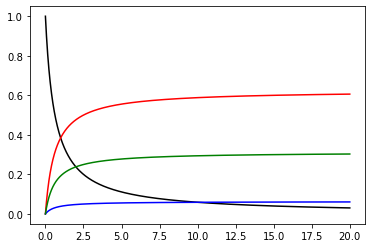

In [10]:
# %load solutionCodeExercise1.py

In [12]:
#%run solutionExercise1.py

Of course, this model is too simplistic to fully explain transcription, and the predicted parameter regimes for the optimization of the experimental detection of the pausing kinetics might be not so accurate. But yet, this analysis predicts which trends to follow when preparing the prediction validation experiments.

We stress that even if the optimal conditions for sensitivity cannot be achieved in practice, at least the <b> planned measurement should ensure the identifiability of the model parameters we want to access by the experiments, and compare across samples </b>. The (anticipated) identifiability or parameters in the planned experiments can be estimated following the identifiability test procedures mentioned above on simulated experimental data that resembles the kind of data we expect from the experiment. 

We also stress that biological noise tends to reduce the accuracy to which observations might fit predictions. We all know this. But if we are working with a stochastic model, the <b> predicted biological noise i.e. the model output variability from simulation to simulation can be itself considered as an output variable </b>. As such, the predicted output variance is an output that might be the most sensitive output so certain parameters, and might also not be sensitive to other parameters so it might be the <b> best choice of model output variable to measure </b>. We can fit for model parameters using an error-function based on the comparison of the <b> predicted variance </b>  of a given (stochastic) output $X$. In this case, 

$$O^i_{pred}=\sigma^2_X(\alpha_1,\alpha_2 … \alpha_N)$$

and depends on model parameters $(\alpha_1,\alpha_2 … \alpha_N)$, and the measured data we compare this predicted output is the <b> measured variance </b> $O^i_{meas}=\sigma^2_X$ computed from the different measurements of $X$. The error function read:

$$E(\alpha_1,\alpha_2 … \alpha_N) = \sum_{i=1}^{i_0} w_i*\displaystyle \Bigg(   O^i_{meas}- O^i_{pred}(\alpha_1,\alpha_2 … \alpha_N)  \Bigg)^2 $$

and we can redo all we have done so far with this new “observable”. And in fact, all moments of the distribution of a model output $X$, not only the variance (which is a second order moment), can be considered as model outputs and compared with similar measurements. 

Finally, the strategy underlined above to optimize the design of a validation to access a particular model parameter also applies to the design of an experiment that intends to distinguish between two models. In this situation, we know the data generated by the test experiment will be analyzed in the framework of the two models and the ability of the two models to fit the data will be assessed by model selection criterions (AIC/BIC… with a penalty to model complexity).  In this scenario, we will look for an output variable $Y$ that <b> maximizes the difference in AIC/BIC between the two models </b>, and this will be equivalent to <b> maximizing the difference between the value of the error function (or the likelihood function) between the two models </b>. This can be achieved either by finding an output that the model 1 will be able to fit well but not the model 2, or conversely, or just an output that will be fitted a tiny bit better by model 1 and a tiny bit less well by model 2. 

If we look one last time at our two models for single gene transcription, one such experiment could include for instance the ratio of elongating polymerases to the nucleoplasmic, unbound polymerases. Indeed, in the most simple model this ratio depends only on one ratio of rates (one independent parameter), whereas in the more complex model, it depends on two ratios (2 independent parameters). If for some reasons there one of the parameters in constrained in each case, the model 2 is susceptible to perform better in the fitting of this output because it has an extra, possibly unconstrained independent parameter to optimize the fit. 
